### Classification Tree Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

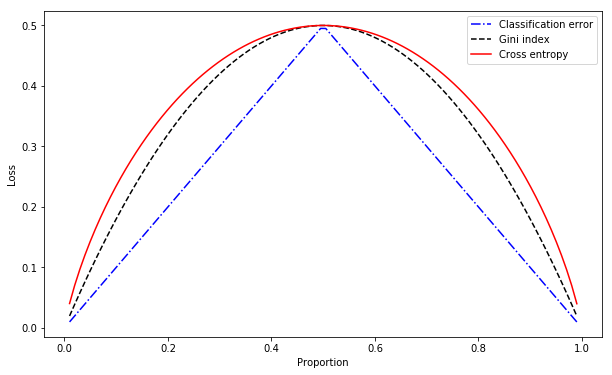

In [2]:
mpl.rcParams['figure.figsize'] = 10, 6
prop = np.linspace(start = 0.01, stop = 1.00, num = 100, endpoint = False)
classification_error = [1 - max(p, 1 - p) for p in prop]
gini_index = 2 * prop * (1 - prop)
cross_entropy = (-prop * np.log(prop) - (1 - prop) * np.log(1 - prop)) / (2 * np.log(2))
plt.plot(prop, classification_error, 'b-.', prop, gini_index, 'k--', prop, cross_entropy, 'r-')
plt.xlabel('Proportion')
plt.ylabel('Loss')
plt.legend(['Classification error', 'Gini index', 'Cross entropy'])
plt.show()

In [3]:
dataset = np.array([[2.771244718, 1.784783929, 0],
                    [1.728571309, 1.169761413, 0],
                    [3.678319846, 2.81281357, 0],
                    [3.961043357, 2.61995032, 0],
                    [2.999208922, 2.209014212, 0],
                    [7.497545867, 3.162953546, 1],
                    [9.00220326, 3.339047188, 1],
                    [7.444542326, 0.476683375, 1],
                    [10.12493903, 3.234550982, 1],
                    [6.642287351, 3.319983761, 1]])
X, y = dataset[:, :2], dataset[:, 2]

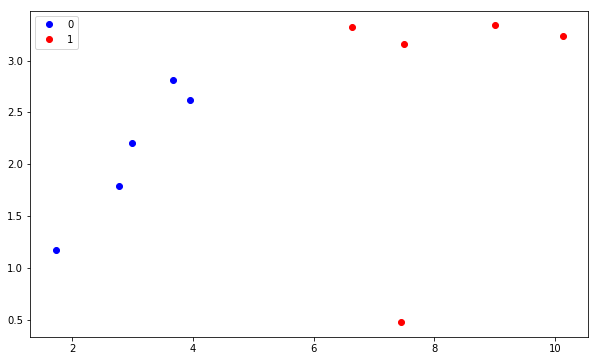

In [4]:
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', X[y == 1, 0], X[y == 1, 1], 'ro')
plt.legend(['0', '1'])
plt.show()

In [5]:
from scipy.stats import mode
mode([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])[0]

array([1])

In [6]:
def gini_index(y, left, right):
    """
    calculate gini index for a split
    """
    prop_left = np.mean(y[left] == mode(y[left])[0])
    prop_right = np.mean(y[right] == mode(y[right])[0])
    return prop_left * (1 - prop_left) + prop_right * (1 - prop_right)

def cross_entropy(y, left, right):
    """
    calculate cross entropy for a split
    """
    prop_left = np.mean(y[left] == mode(y[left])[0])
    prop_right = np.mean(y[right] == mode(y[right])[0])
    return (-prop_left * np.log(prop_left) - prop_right * np.log(prop_right)) / (2 * np.log(2))

In [7]:
class Node:
    def __init__(self):
        self.feature_idx = np.inf
        self.split = np.inf
        self.loss = np.inf
        self.child_idx = [np.inf, np.inf]
        self.left = None
        self.right = None
        
    def _split_feature(self, X, y, feature_idx, split):
        """
        split a data set on an attribute and an attribute value
        """
        left, right = list(), list()
        for row_idx in range(X.shape[0]):
            if X[row_idx, feature_idx] < split:
                left.append(row_idx)
            else:
                right.append(row_idx)
        
        return left, right
    
    def get_optim_split(self, X, y):
        """
        search for the best split
        """
        for feature_idx in range(X.shape[1]):
            for row_idx in range(X.shape[0]):
                left, right = self._split_feature(X, y, feature_idx, X[row_idx, feature_idx])
                cost = gini_index(y, left, right)
                if cost < self.loss:
                    self.feature_idx, self.split, self.loss, self.child_idx = feature_idx, X[row_idx, feature_idx], cost, [left, right]

In [8]:
class ClassificationTree:
    def __init__(self):
        self.root = Node()
        
    def _to_leaf(self, y):
        return mode(y)[0]
    
    def _split(self, X, y, node, max_depth, min_split_sample, depth):
        left, right = node.child_idx
    
        if not left or not right:
            node.left = node.right = self._to_leaf(y)
    
        if depth > max_depth:
            node.left, node.right = self._to_leaf(y[left]), self._to_leaf(y[right])
        
        if len(left) <= min_split_sample:
            node.left = self._to_leaf(y[left])
        else:
            node.left = Node()
            node.left.get_optim_split(X[left, :], y[left])
            self._split(X[left, :], y[left], node.left, max_depth, min_split_sample, depth + 1)
        
        if len(right) <= min_split_sample:
            node.right = self._to_leaf(y[right])
        else:
            node.right = Node()
            node.right.get_optim_split(X[right, :], y[right])
            self._split(X[right, :], y[right], node.right, max_depth, min_split_sample, depth + 1)
    
    def build_tree(self, X, y, max_depth, min_split_sample):
        self.root.get_optim_split(X, y)
        self._split(X, y, self.root, max_depth, min_split_sample, 1)
    
    def print_tree(self, node, depth = 0):
        if isinstance(node, Node):
            print('{}[X{} < {}]'.format((depth * '-'), node.feature_idx, node.split))
            self.print_tree(node.left, depth + 1)
            self.print_tree(node.right, depth + 1)
        else:
            print('{}[{}]'.format(depth * '-', node))

In [9]:
tree = ClassificationTree()
tree.build_tree(X, y, 2, 3)
tree.print_tree(tree.root)

[X0 < 6.642287351]
-[X0 < 2.771244718]
--[[ 0.]]
--[X0 < 3.678319846]
---[[ 0.]]
---[[ 0.]]
-[X0 < 7.497545867]
--[[ 1.]]
--[[ 1.]]


C:\Users\Bangda\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Bangda\Anaconda2\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
